# Pregunta 4

- En un estudio clínico se busca analizar el efecto de una droga (medicamento) sobre la disminución de la presión de la sangre cuando ésta se aplica, para lo cual se utiliza una muestra de 11 personas, obteniendo los siguientes datos (presión codificada). Utilice α = 0.01. Probar que es efectivo este medicamento.

- Antes_de_la_droga	13	12	14	12	9	14	12	10	9	13	12
- Después_de_la_droga	13	10	12	12	7	15	10	7	8	11	11


## A.	HIPOTESIS DE INVESTIGACIÓN:

- H0: El medicamento produce una disminución de la presión de la sangre
- H1: El medicamento NO produce una disminución de la presión de la sangre

## B.	MUESTRA

- Nivel de confianza = 1 - α = 99% = 0.99
- Tamaño de muestras n = 11

## C.	SIGNIFICANCIA

- Error tipo I = α = 0.01 = 1%

## E.	DATOS

- Datos recolectados en la pregunta
- Se adjunta en un arreglo de numpy

In [2]:
# Importación de librerias a utilizar
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy import stats as ss

In [3]:
# Carga de los datos con numpy
antes_d = np.array([13, 12, 14, 12, 9, 14, 12, 10, 9, 13, 12])
despues_d = np.array([13, 10, 12, 12, 7, 15, 10, 7, 8, 11, 11])
# Tamaño de la muestra
n1 = len(antes_d)
# Significancia
alpha = 0.01

print('Datos recolectados de la balanza1: ', antes_d)
print('Datos recolectados de la balanza2: ', despues_d)

Datos recolectados de la balanza1:  [13 12 14 12  9 14 12 10  9 13 12]
Datos recolectados de la balanza2:  [13 10 12 12  7 15 10  7  8 11 11]


## F.	HIPOTESIS ESTADISTICA

- Asumiendo la distribución de los datos sigue una distribución normal:

- H1:  μ1 > μ2              H. Nula
- H0:  μ1 <= μ2             H. Alterna

## G. TIPO DE PRUEBA

- Sera de doble cola derecha ya que tiene el sigmo mayor ">"

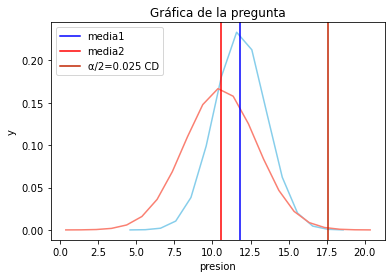

In [4]:
# Gráfica de referencia para las colas
mu1, sigma1 = np.mean(antes_d), np.std(antes_d)
mu2, sigma2 = np.mean(despues_d), np.std(despues_d)

X = ss.norm(mu1, sigma1)
Y = ss.norm(mu2, sigma2)

graph1 = np.arange(X.ppf(0.00001), X.ppf(0.99999))
graph2 = np.arange(Y.ppf(0.00001), Y.ppf(0.99999))

plt.plot(graph1, X.pdf(graph1), c='skyblue')
plt.plot(graph2, Y.pdf(graph2), c='salmon')

tail_left = int(graph1.size * 0.05) + 1
tail_right = int(graph1.size * 0.95) - 1

plt.axvline(mu1, c='blue', label='media1')
plt.axvline(mu2, c='red', label='media2')
plt.axvline(graph1[tail_right], c='#c02200', label='α/2=0.025 CD')

plt.title('Gráfica de la pregunta')
plt.ylabel('y')
plt.xlabel('presion')

plt.legend()

In [5]:
data = {
    'Antes_de_la_droga': antes_d,
    'Después_de_la_droga': despues_d
}

data = pd.DataFrame(data)

data.describe()

,Antes_de_la_droga,Después_de_la_droga
count,11.000000,11.000000
mean,11.818182,10.545455
std,1.778661,2.504541
min,9.000000,7.000000
25%,11.000000,9.000000
50%,12.000000,11.000000
75%,13.000000,12.000000
max,14.000000,15.000000


In [6]:
t, p_value = ss.ttest_rel(antes_d, despues_d)

print('El estadistico de prueba "t" es:', t)
print('El p-valor es: ', p_value)

El estadistico de prueba "t" es: 3.5445877847928333
El p-valor es:  0.005315958290661358


### Podemos respaldar nuestros datos con megaStat de Excel

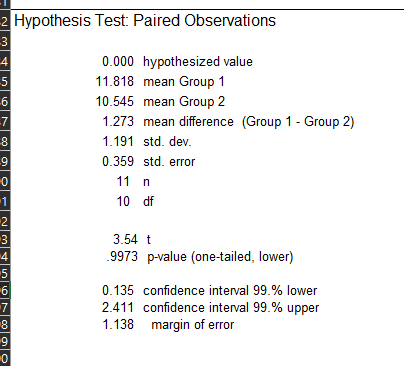

## I.	CONCLUSIÓN

- p-value < alpha
- 0.053159 < 0.05000 (Verdadero) Rechazo la Ho

- Hay suficiente evidencia en las muestras jusitifcar un rechazo El medicamento produce una disminución de la presión de la sangre A un nivel de confianza de 99%.
